### Ньяти Каелиле БВТ2201
### Практическая работа 8

#### Exercise 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

# Data from the table
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([2.2, 3.1, 4.1, 5.0, 5.8, 6.9, 7.8, 9.0, 10.2, 11.1])

# Number of data points
n = len(x)



In [3]:
# Task 1: Calculate b0, b1 using Formula 2
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_xy = np.sum(x * y)
sum_x2 = np.sum(x ** 2)

b0 = (sum_y * sum_x2 - (sum_xy * sum_x)) / (n*sum_x2 - (sum_x * sum_x))  #eq 1
b1 = (sum_y * sum_x - (n*sum_xy))/ (sum_x * sum_x - (n * sum_x2)) #eq 2

# Calculate correlation coefficient r
x_mean = np.mean(x)
y_mean = np.mean(y)

Sx = np.sum((x - x_mean)**2)/n
Sy = np.sum((y- y_mean)**2)/n

r = b1 * (Sx/Sy) #eq 3

print(f"Task 1: Coefficients")
print(f"b0 (intercept): {b0:.4f}")
print(f"b1 (slope): {b1:.4f}")
print(f"Correlation coefficient (r): {r:.4f}")

Task 1: Coefficients
b0 (intercept): 1.0600
b1 (slope): 0.9927
Correlation coefficient (r): 1.0050


#### Exercise 2

In [4]:
# Task 2: Calculate D1 (variance)
f_x = b0 + b1 * x #linear regression equation


D1 = np.sum((y - f_x) ** 2) / (n - 1)

print(f"\nTask 2: Variance (D1): {D1:.4f}")


Task 2: Variance (D1): 0.0213


#### Exercise 3

In [5]:
# Task 3: Fisher test
S2 = 0.1  # Given variance of random effects
F_calculated = D1 / S2

# Fisher critical value
alpha = 0.05
F_critical = f.ppf(1 - alpha, n - 1, n - 1)

print(f"\nTask 3: Fisher Test")
print(f"F_calculated: {F_calculated:.4f}")
print(f"F_critical: {F_critical:.4f}")
if F_calculated < F_critical:
    print("The variance D1 is not significantly different from S^2 (acceptable regression model).")
else:
    print("The variance D1 is significantly different from S^2 (model may not fit well).")


Task 3: Fisher Test
F_calculated: 0.2129
F_critical: 3.1789
The variance D1 is not significantly different from S^2 (acceptable regression model).


#### Exercise 4

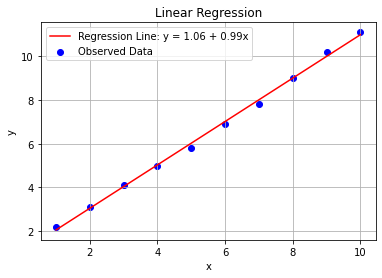

In [6]:
# Task 4: Plot graph
plt.scatter(x, y, label="Observed Data", color="blue")
plt.plot(x, f_x, label=f"Regression Line: y = {b0:.2f} + {b1:.2f}x", color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression")
plt.legend()
plt.grid(True)
plt.show()



#### Exercise 5

In [7]:
# Task 5: Conclusion
print("\nTask 5: Conclusion")
if F_calculated < F_critical:
    print("The regression equation is suitable for further use.")
else:
    print("The regression equation is not suitable for further use.")


Task 5: Conclusion
The regression equation is suitable for further use.


#### Additional work

[ 3.504  4.404  5.404  6.304  7.104  8.204  9.104 10.304 11.504 12.404]
[ 4.156  5.056  6.056  6.956  7.756  8.856  9.756 10.956 12.156 13.056]
[ 4.808  5.708  6.708  7.608  8.408  9.508 10.408 11.608 12.808 13.708]


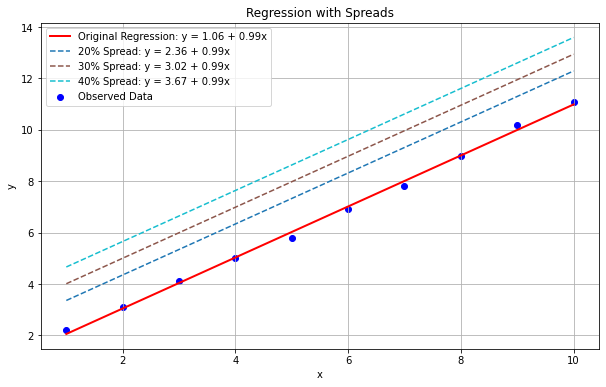

In [33]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([2.2, 3.1, 4.1, 5.0, 5.8, 6.9, 7.8, 9.0, 10.2, 11.1])

# Function to compute b0 and b1 based on the regression formulas
def calculate_b0_b1(x, y):
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_x2 = np.sum(x ** 2)
    sum_xy = np.sum(x * y)
    n = len(x)

    b0 = (sum_y * sum_x2 - (sum_xy * sum_x)) / (n*sum_x2 - (sum_x * sum_x))  #eq 1
    b1 = (sum_y * sum_x - (n*sum_xy))/ (sum_x * sum_x - (n * sum_x2)) #eq 2

    return b0, b1

# Calculate original b0 and b1
b0_orig, b1_orig = calculate_b0_b1(x, y)
f_x_orig = b0_orig + b1_orig * x  # Original regression line

s_b0 = []
s_b1 = []

# Create modified y arrays with different percentage spreads (±20%, ±30%, ±40%)
percent_spreads = [20, 30, 40]
colors = plt.cm.tab10(np.linspace(0, 1, len(percent_spreads)))  # Generate unique colors
labels = []

plt.figure(figsize=(10, 6))

# Plot original data and regression line
plt.scatter(x, y, label="Observed Data", color="blue")
plt.plot(x, f_x_orig, label=f"Original Regression: y = {b0_orig:.2f} + {b1_orig:.2f}x", color="red", linewidth=2)

# Add the spread graphs
for spread, color in zip(percent_spreads, colors):
    #noise = np.random.uniform(-spread/100, spread/100, size=y.shape)
    #spread_percentage = spread / 100
    #y_spread = y * (1+ spread_percentage) # Apply percentage spread to y

    #k = spread / 100 * y_mean
    k= spread / 100 * y_mean
    y_spread = y + k  # Shift y-values by a constant amount

    #print(y)
    print(y_spread)

    # Calculate new b0 and b1 for the spread data
    b0_spread, b1_spread = calculate_b0_b1(x, y_spread)
    f_x_spread = b0_spread + b1_spread * x  # Regression line for spread data

    # Calculate sb0 and sb1
    s_b0.append(abs(b0_orig - b0_spread) / b0_orig )  # Convert to percentage
    s_b1.append(abs(b1_orig - b1_spread) / b1_orig )  # Convert to percentage

    # Plot the spread regression line
    plt.plot(
        x,
        f_x_spread,
        label=f"{spread}% Spread: y = {b0_spread:.2f} + {b1_spread:.2f}x",
        color=color,
        linestyle="--",
        linewidth=1.5,
    )

# Add titles, labels, and legend
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regression with Spreads")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

SB0 = [1.2301886792452872, 1.8452830188679372, 2.4603773584905873]
SB1= [5.591782633185309e-16, 5.591782633185309e-16, 5.591782633185309e-16]
[20, 30, 40]


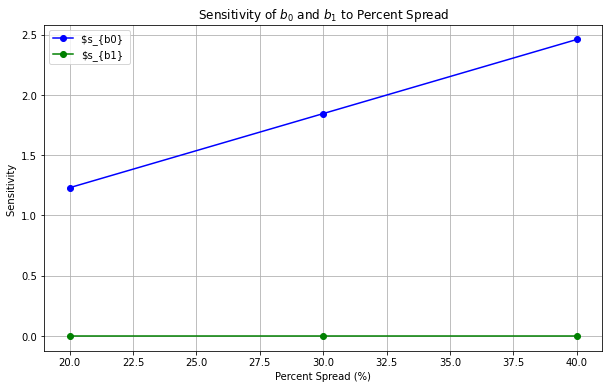

In [34]:
# Plot s_b0 and s_b1 against percent spread
print(f"SB0 = {s_b0}")
print(f"SB1= {s_b1}")
print(percent_spreads)

plt.figure(figsize=(10, 6))
plt.plot(percent_spreads, s_b0, marker='o', label="$s_{b0} ", color="blue")
plt.plot(percent_spreads, s_b1, marker='o', label="$s_{b1}", color="green")

# Add titles, labels, and legend
plt.xlabel("Percent Spread (%)")
plt.ylabel("Sensitivity ")
plt.title("Sensitivity of $b_0$ and $b_1$ to Percent Spread")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()